# Inference

In [1]:
import os
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [2]:
cur_dir = os.getcwd()

In [3]:
main_dir = os.path.dirname(cur_dir)
figures_dir = os.path.join(main_dir, "figures")
scripts_dir = os.path.join(main_dir, "scripts")
work_dir = os.path.join(main_dir, "public/Birds")
detect_dir = os.path.join(work_dir, "label", "detection")
data_dir = os.path.join(work_dir, "dataset")
models_dir = os.path.join(main_dir, "models")
inference_dir = os.path.join(main_dir, "inference")

In [4]:
model_path = os.path.join(models_dir, "faster_rcnn_resnet101_v1_640x640_coco17_tpu-8_20201205_2")

In [5]:
%cd $scripts_dir
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path $model_path/pipeline.config --trained_checkpoint_dir $model_path --output_directory $model_path/saved_model

/home/michal/MSc_lin/7144COMP/Coursework_2/scripts
2020-12-08 20:49:30.203371: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-08 20:49:31.481201: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-08 20:49:31.504442: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-08 20:49:31.504865: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:1c:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.86GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.23GiB/s
2020-12-08 20:49:31.504883: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-12-08 20:4

In [17]:
labels_path = os.path.join(work_dir, "label_map.pbtxt")
saved_model_path = os.path.join(model_path, "saved_model", "saved_model")

In [19]:
image_paths = []
for filename in os.listdir(inference_dir):
    image_paths.append(os.path.join(inference_dir, filename))

In [20]:
start_time = time.time()
detect_fn = tf.saved_model.load(saved_model_path)
end_time = time.time()
elapsed_time = end_time - start_time
elapsed_time

9.85435175895691

In [21]:
category_index = label_map_util.create_category_index_from_labelmap(labels_path, use_display_name=True)

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_957.jpg... Done


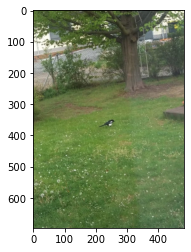

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_952.jpg... Done


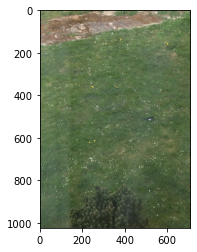

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_916.jpg... Done


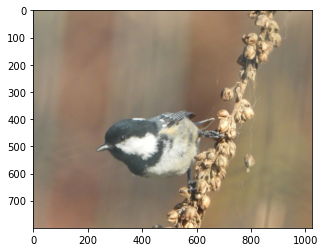

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_915.jpg... Done


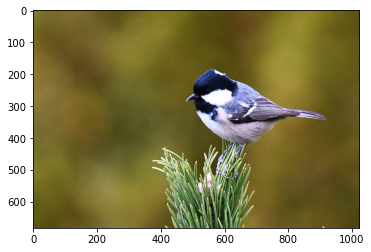

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0988.jpg... Done


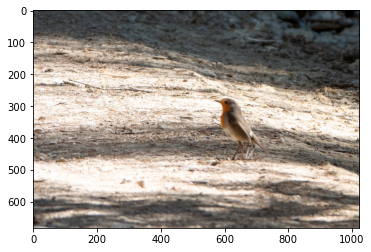

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_914.jpg... Done


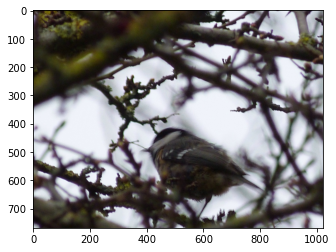

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0989.jpg... Done


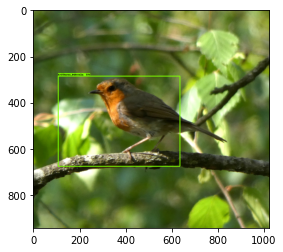

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_920.jpg... Done


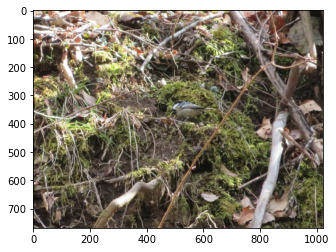

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_953.jpg... Done


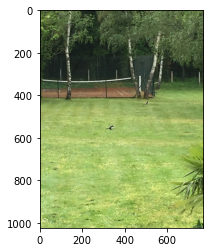

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_921.jpg... Done


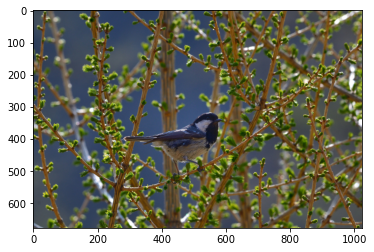

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Periparus_ater_917.jpg... Done


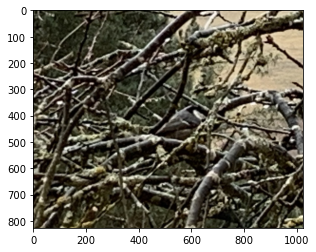

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0992.jpg... Done


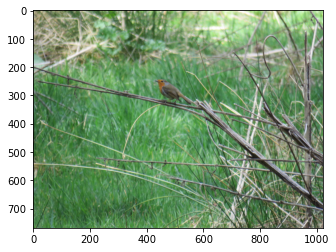

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0991.jpg... Done


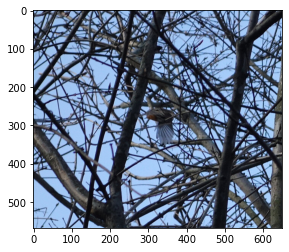

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_956.jpg... Done


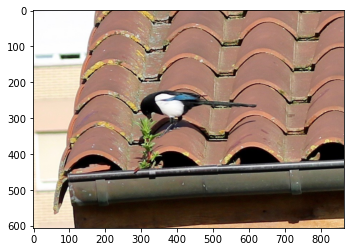

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_955.jpg... Done


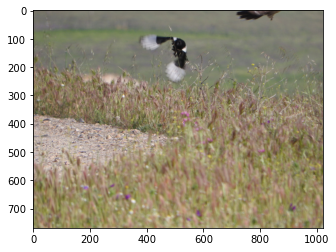

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/ErithacusRubecula0990.jpg... Done


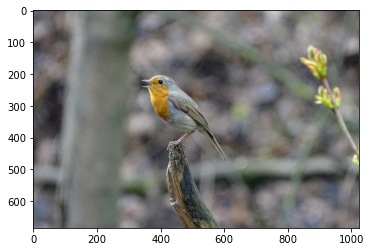

Running inference for /home/michal/MSc_lin/7144COMP/Coursework_2/inference/Pica_pica_954.jpg... Done


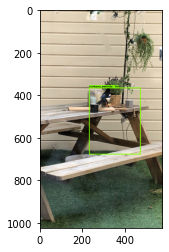

In [33]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_images(path):
    return np.array(Image.open(path))


for image_path in image_paths:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_images(image_path)

    input_tensor = tf.convert_to_tensor(image_np)

    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()
    im = Image.fromarray(image_np_with_detections)
    im.save(f"{image_path.rsplit('/', 1)[1]}")
